In [163]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import pickle
import torch.nn.functional as F
from torch.utils.data import Dataset
import pandas as pd
import random
import matplotlib.pyplot as plt
import pdb
import math
import copy

# RNN Learning Rate

In [170]:
with open('model/rnn-vi-lr-0001/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_lr0001 = pd.DataFrame(content).T
df_lr0001.columns=['index', 'train_loss0001', 'BLEU0001']
df_lr0001 = df_lr0001.set_index('index')

In [171]:
with open('model/rnn-vi-lr-001/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_lr001 = pd.DataFrame(content).T
df_lr001.columns=['index', 'train_loss001', 'BLEU001']
df_lr001 = df_lr001.set_index('index')

In [172]:
with open('model/rnn-vi-lr-01/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_lr01 = pd.DataFrame(content).T
df_lr01.columns=['index', 'train_loss01', 'BLEU01']
df_lr01 = df_lr01.set_index('index')

In [173]:
df_lr_results = df_lr01.merge(df_lr001, left_index=True, right_index=True).merge(df_lr0001, left_index=True, right_index=True)
df_lr_results.head()

df_lr_bleu = df_lr_results[['BLEU01', 'BLEU001', 'BLEU0001']]
df_lr_loss = df_lr_results[['train_loss01', 'train_loss001', 'train_loss0001']]


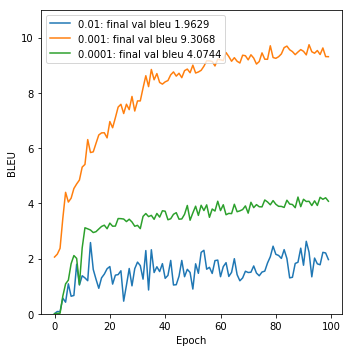

In [174]:
lr_results = []
lr_sizes = [0.01, 0.001, 0.0001]
for i in range(3):
    value = round(list(df_lr_bleu.iloc[-1])[i], 4)
    value = str(lr_sizes[i])+": final val bleu "+str(value)
    lr_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_lr_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(lr_results, loc='upper left')
plt.tight_layout()
plt.ylim(0, 11)
plt.savefig('results/rnn_vi_lr_bleu.png', dpi=300)
plt.show()

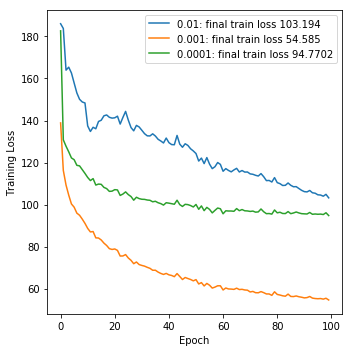

In [175]:
lr_results = []
lr_sizes = [0.01, 0.001, 0.0001]
for i in range(3):
    value = round(list(df_lr_loss.iloc[-1])[i], 4)
    value = str(lr_sizes[i])+": final train loss "+str(value)
    lr_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_lr_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(lr_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_lr_loss.png', dpi=300)
plt.show()

# RNN Drop Rate

In [176]:
with open('model/rnn-vi-dr-0/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_dr0 = pd.DataFrame(content).T
df_dr0.columns=['index', 'train_loss0', 'BLEU0']
df_dr0 = df_dr0.set_index('index')

In [177]:
with open('model/rnn-vi-dr-3/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_dr3 = pd.DataFrame(content).T
df_dr3.columns=['index', 'train_loss3', 'BLEU3']
df_dr3 = df_dr3.set_index('index')

In [178]:
with open('model/rnn-vi-dr-6/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_dr6 = pd.DataFrame(content).T
df_dr6.columns=['index', 'train_loss6', 'BLEU6']
df_dr6 = df_dr6.set_index('index')

In [179]:
df_dr_results = df_dr0.merge(df_dr3, left_index=True, right_index=True).merge(df_dr6, left_index=True, right_index=True)
df_dr_results.head()

df_dr_bleu = df_dr_results[['BLEU0', 'BLEU3', 'BLEU6']]
df_dr_loss = df_dr_results[['train_loss0', 'train_loss3', 'train_loss6']]


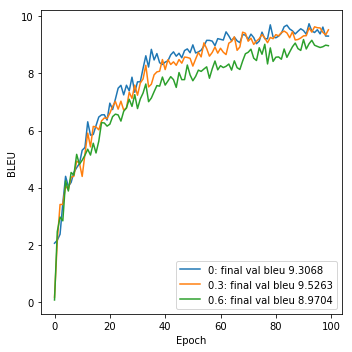

In [180]:
dr_results = []
dr = [0, 0.3, 0.6]
for i in range(3):
    value = round(list(df_dr_bleu.iloc[-1])[i], 4)
    value = str(dr[i])+": final val bleu "+str(value)
    dr_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_dr_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(dr_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_dr_bleu.png', dpi=300)
plt.show()

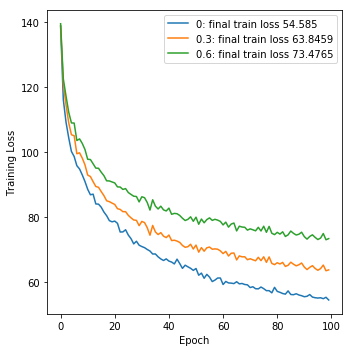

In [181]:
dr_results = []
dr = [0, 0.3, 0.6]
for i in range(3):
    value = round(list(df_dr_loss.iloc[-1])[i], 4)
    value = str(dr[i])+": final train loss "+str(value)
    dr_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_dr_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(dr_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_dr_loss.png', dpi=300)
plt.show()

# RNN Hidden Size

In [117]:
with open('model/rnn-vi-hs-128/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_hs128 = pd.DataFrame(content).T
df_hs128.columns=['index', 'train_loss128', 'BLEU128']
df_hs128 = df_hs128.set_index('index')

In [118]:
with open('model/rnn-vi-hs-256/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_hs256 = pd.DataFrame(content).T
df_hs256.columns=['index', 'train_loss256', 'BLEU256']
df_hs256 = df_hs256.set_index('index')

In [119]:
with open('model/rnn-vi-hs-512/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_hs512 = pd.DataFrame(content).T
df_hs512.columns=['index', 'train_loss512', 'BLEU512']
df_hs512 = df_hs512.set_index('index')

In [120]:
with open('model/rnn-vi-hs-1024/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_hs1024 = pd.DataFrame(content).T
df_hs1024.columns=['index', 'train_loss1024', 'BLEU1024']
df_hs1024 = df_hs1024.set_index('index')

In [121]:
df_hs_results = df_hs128.merge(df_hs256, how='left', left_index=True, right_index=True).merge(df_hs512, how='left', left_index=True, right_index=True).merge(df_hs1024, how='left', left_index=True, right_index=True)
df_hs_results.head()

df_hs_bleu = df_hs_results[['BLEU128', 'BLEU256', 'BLEU512', 'BLEU1024']]
df_hs_loss = df_hs_results[['train_loss128', 'train_loss256', 'train_loss512', 'train_loss1024']]


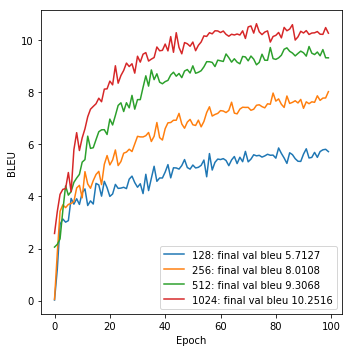

In [122]:
hs_results = []
hs = [128, 256, 512, 1024]
for i in range(4):
    value = round(list(df_hs_bleu.iloc[-1])[i], 4)
    if hs[i]==512:
        value = round(df_hs512['BLEU512'].iloc[-1], 4)
    elif hs[i]==1024:
        value = round(df_hs1024['BLEU1024'].iloc[-1], 4)
    value = str(hs[i])+": final val bleu "+str(value)
    hs_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_hs_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(hs_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_hs_bleu.png', dpi=300)
plt.show()

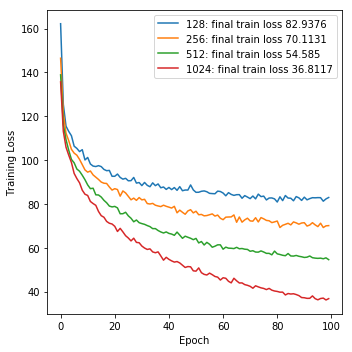

In [150]:
hs_results = []
hs = [128, 256, 512, 1024]
for i in range(4):
    value = round(list(df_hs_loss.iloc[-1])[i], 4)
    if hs[i]==512:
        value = round(df_hs512['train_loss512'].iloc[-1], 4)
    elif hs[i]==1024:
        value = round(df_hs1024['train_loss1024'].iloc[-1], 4)
    value = str(hs[i])+": final train loss "+str(value)
    hs_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_hs_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(hs_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_hs_loss.png', dpi=300)
plt.show()

# RNN Teacher Forcing Ratio

In [139]:
with open('model/first_run/rnn-vi-hs-256/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_tf5 = pd.DataFrame(content).T
df_tf5.columns=['index', 'train_loss5', 'BLEU5']
df_tf5 = df_tf5.set_index('index')

In [140]:
with open('model/first_run/rnn-vi-tf-2/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_tf2 = pd.DataFrame(content).T
df_tf2.columns=['index', 'train_loss2', 'BLEU2']
df_tf2 = df_tf2.set_index('index')

In [141]:
with open('model/first_run/rnn-vi-tf-8/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_tf8 = pd.DataFrame(content).T
df_tf8.columns=['index', 'train_loss8', 'BLEU8']
df_tf8 = df_tf8.set_index('index')

In [142]:
df_tf_results = df_tf2.merge(df_tf5, how='left', left_index=True, right_index=True).merge(df_tf8, how='left', left_index=True, right_index=True)
df_tf_results.head()

df_tf_bleu = df_tf_results[['BLEU2', 'BLEU5', 'BLEU8']]
df_tf_loss = df_tf_results[['train_loss2', 'train_loss5', 'train_loss8']]


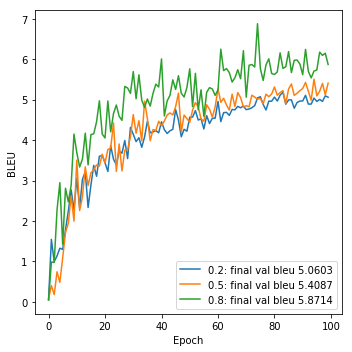

In [152]:
tf_results = []
tf = [0.2, 0.5, 0.8]
for i in range(3):
    value = round(list(df_tf_bleu.iloc[-1])[i], 4)
    value = str(tf[i])+": final val bleu "+str(value)
    tf_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_tf_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(tf_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_tf_bleu.png', dpi=300)
plt.show()

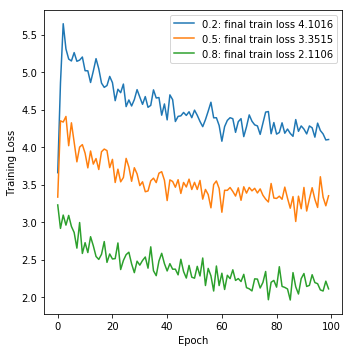

In [151]:
tf_results = []
tf = [0.2, 0.5, 0.8]
for i in range(3):
    value = round(list(df_tf_loss.iloc[-1])[i], 4)
    value = str(tf[i])+": final train loss "+str(value)
    tf_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_tf_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(tf_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_tf_loss.png', dpi=300)
plt.show()

# RNN PreTrained vs Non

In [145]:
with open('model/first_run/rnn-vi-nopretrained/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_npt = pd.DataFrame(content).T
df_npt.columns=['index', 'train_lossnpt', 'BLEUnpt']
df_npt = df_npt.set_index('index')

In [146]:
with open('model/first_run/rnn-vi-hs-512/_accuracy.p', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
df_pt = pd.DataFrame(content).T
df_pt.columns=['index', 'train_losspt', 'BLEUpt']
df_pt = df_pt.set_index('index')

In [147]:
df_pt_results = df_npt.merge(df_pt, how='left', left_index=True, right_index=True)
df_pt_results.head()

df_pt_bleu = df_pt_results[['BLEUnpt', 'BLEUpt']]
df_pt_loss = df_pt_results[['train_lossnpt', 'train_losspt']]


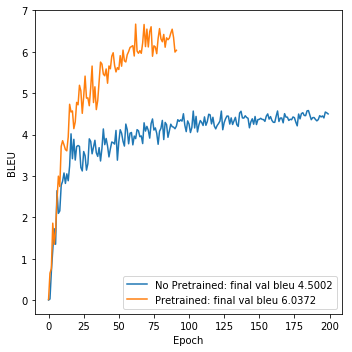

In [153]:
pt_results = []
pt = ['No Pretrained', 'Pretrained']
for i in range(2):
    if pt[i]=='No Pretrained':
        value = round(df_npt['BLEUnpt'].iloc[-1], 4)
    if pt[i]=='Pretrained':
        value = round(df_pt['BLEUpt'].iloc[-1], 4)
    value = str(pt[i])+": final val bleu "+str(value)
    pt_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_pt_bleu)
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.legend(pt_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_pt_bleu.png', dpi=300)
plt.show()

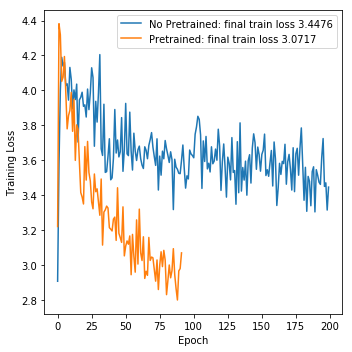

In [154]:
pt_results = []
pt = ['No Pretrained', 'Pretrained']
for i in range(2):
    if pt[i]=='No Pretrained':
        value = round(df_npt['train_lossnpt'].iloc[-1], 4)
    if pt[i]=='Pretrained':
        value = round(df_pt['train_losspt'].iloc[-1], 4)
    value = str(pt[i])+": final train loss "+str(value)
    pt_results.append(value)
    
fig = plt.figure(figsize = (5,5))

plt.plot(df_pt_loss)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(pt_results, loc='best')
plt.tight_layout()
plt.savefig('results/rnn_vi_pt_loss.png', dpi=300)
plt.show()